In [28]:
import requests
import random
from time import sleep

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [29]:
from scipy.cluster.vq import whiten, kmeans2

In [30]:
def call_api(uri):
    json = requests.get(uri, headers={'X-Auth-Token': 'ca62eb2a6f6f44bc9b257f70138ad4d7'}).json()
    return json

In [31]:
teams = call_api('http://api.football-data.org/v1/competitions/439/leagueTable')

In [33]:
team_for_pd = list()
for x in range(len(teams['standing'])):

    team_name = teams['standing'][x]['teamName']
    team_losses = teams['standing'][x]['losses']
    team_wins = teams['standing'][x]['wins']

    team_cost_link = call_api(teams['standing'][x]['_links']['team']['href'])
    if team_cost_link['squadMarketValue'] is None:
        team_cost = (random.randrange(288651478, 1032156791, 1325647))
    else:
        team_cost = team_cost_link['squadMarketValue']

    team_for_pd.append({'name': team_name, 'losses': team_losses, 'wins': team_wins, 'cost': team_cost})
    sleep(1)

team_for_pd

[{'cost': 854702747, 'losses': 2, 'name': 'SL Benfica', 'wins': 25},
 {'cost': 706230283, 'losses': 2, 'name': 'FC Porto', 'wins': 22},
 {'cost': 906402980, 'losses': 6, 'name': 'Sporting CP', 'wins': 21},
 {'cost': 931590273, 'losses': 8, 'name': 'Vitoria Guimaraes', 'wins': 19},
 {'cost': 781792162, 'losses': 10, 'name': 'Sporting Braga', 'wins': 15},
 {'cost': 563060407, 'losses': 10, 'name': 'Maritimo Funchal', 'wins': 13},
 {'cost': 537873114, 'losses': 13, 'name': 'FC Rio Ave', 'wins': 14},
 {'cost': 507383233, 'losses': 14, 'name': 'Feirense', 'wins': 13},
 {'cost': 500754998, 'losses': 11, 'name': 'Boavista Porto FC', 'wins': 10},
 {'cost': 631994051, 'losses': 16, 'name': 'GD Estoril Praia', 'wins': 10},
 {'cost': 459659941, 'losses': 13, 'name': 'G.D. Chaves', 'wins': 8},
 {'cost': 517988409, 'losses': 16, 'name': 'Vitoria Setubal', 'wins': 9},
 {'cost': 1027036857, 'losses': 14, 'name': 'FC Paços de Ferreira', 'wins': 8},
 {'cost': 812282043, 'losses': 16, 'name': 'C.F. Os B

In [34]:
teams_pd = pd.DataFrame(team_for_pd)
teams_pd

,cost,losses,name,wins
0,854702747,2,SL Benfica,25
1,706230283,2,FC Porto,22
2,906402980,6,Sporting CP,21
3,931590273,8,Vitoria Guimaraes,19
4,781792162,10,Sporting Braga,15
5,563060407,10,Maritimo Funchal,13
6,537873114,13,FC Rio Ave,14
7,507383233,14,Feirense,13
8,500754998,11,Boavista Porto FC,10
9,631994051,16,GD Estoril Praia,10


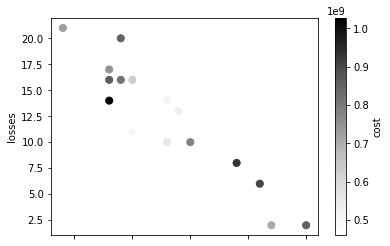

In [35]:
teams_pd.plot.scatter(x='wins', y='losses', c='cost', s=50)

In [36]:
teams_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 4 columns):
cost      18 non-null int64
losses    18 non-null int64
name      18 non-null object
wins      18 non-null int64
dtypes: int64(3), object(1)
memory usage: 656.0+ bytes


In [37]:
del teams_pd['wins']
del teams_pd['name']
teams_pd

,cost,losses
0,854702747,2
1,706230283,2
2,906402980,6
3,931590273,8
4,781792162,10
5,563060407,10
6,537873114,13
7,507383233,14
8,500754998,11
9,631994051,16


In [38]:
whitened = whiten(teams_pd.as_matrix())
whitened

array([[5.08190715, 0.37928372],
       [4.19911687, 0.37928372],
       [5.38930733, 1.13785117],
       [5.5390664 , 1.5171349 ],
       [4.64839407, 1.89641862],
       [3.34785482, 1.89641862],
       [3.19809575, 2.46534421],
       [3.01680846, 2.65498607],
       [2.97739818, 2.08606049],
       [3.75772173, 3.0342698 ],
       [2.73305444, 2.46534421],
       [3.07986491, 3.0342698 ],
       [6.10657444, 2.65498607],
       [4.82968135, 3.0342698 ],
       [5.12131743, 3.0342698 ],
       [4.45922472, 3.22391166],
       [5.04249687, 3.79283725],
       [4.33311182, 3.98247911]])

In [39]:
centroids, cluster_map = kmeans2(whitened, 3)
centroids, cluster_map

(array([[3.15868547, 2.5195276 ],
        [4.98206777, 3.28712561],
        [4.97155836, 1.06199443]]),
 array([2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]))

In [40]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
colors

['b',
 'b',
 'b',
 'b',
 'b',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g']

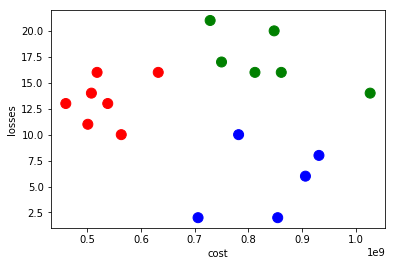

In [41]:
teams_pd.plot.scatter(x='cost', y='losses', c=colors, s=100)

In [45]:
centroids, cluster_map = kmeans2(whitened, 5)
centroids, cluster_map

(array([[4.89011045, 0.63213954],
        [5.43134497, 2.02284653],
        [4.75716644, 3.41355352],
        [3.05464233, 2.31363072],
        [3.41879332, 3.0342698 ]]),
 array([0, 0, 0, 1, 1, 3, 3, 3, 3, 4, 3, 4, 1, 2, 2, 2, 2, 2]))

In [46]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
colors

['r',
 'r',
 'r',
 'g',
 'g',
 'y',
 'y',
 'y',
 'y',
 'm',
 'y',
 'm',
 'g',
 'b',
 'b',
 'b',
 'b',
 'b']

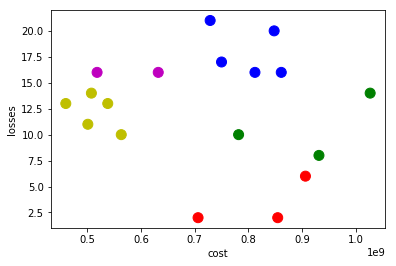

In [47]:
teams_pd.plot.scatter(x='cost', y='losses', c=colors, s=100)